In [1]:
cd ..

/Users/dorislee/Desktop/Research/lux/lux


In [2]:
import lux
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                               

Data downloaded from: https://www.kaggle.com/c/sberbank-russian-housing-market/data

Notebook based on: https://github.com/codrut3/Kaggle-notebooks/blob/54373d10aeacc7df6812098aa515fe9a03d30977/Sberbank%20Exploratory%20Data%20Analysis.ipynb

In [3]:
train = pd.read_csv("lux/data/sberbank-russian-housing-market/train.csv")

In [4]:
# Simplified In [6] in original notebook
initial_columns1 = train.columns.tolist()

train.set_index('id', inplace=True)
train.reset_index(inplace=True)
train.reset_index(inplace=True)
# train = train[initial_columns1]

#just work with a subset of columns for now (due to scalability issue)
train = train[['id','index','timestamp', 'full_sq', 'kitch_sq','life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room','price_doc','product_type']]
train = train.dropna() # hack to make sure Filter works


In [5]:
# Context: Explicitly specified by user
train.setContext([lux.Spec(attribute="price_doc",weight=1,binSize=50), lux.Spec(attribute="index")])

[Spec < description:,channel:,attribute:price_doc,aggregation:,value:>dataModel:,dataType:,binSize:50, Spec < description:,channel:,attribute:index,aggregation:,value:>dataModel:,dataType:,binSize:0]


/Users/dorislee/Desktop/Research/lux/lux/lux/compiler/Validator.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  checkValExists = spec.attribute and spec.value in uniqueVals[spec.attribute]


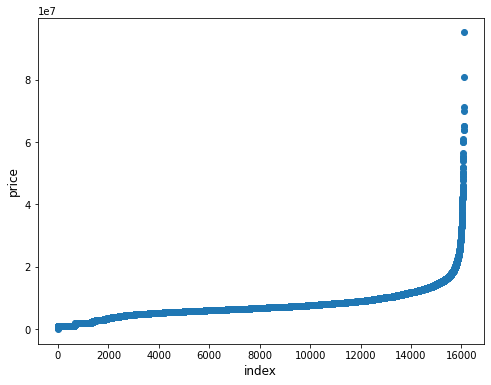

In [6]:
# In[8] in original notebook
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train.price_doc.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

In [7]:
# Context: Explicitly specified by user
train.setContext([lux.Spec(attribute="price_doc",weight=1)])
train

[Spec < description:,channel:,attribute:price_doc,aggregation:,value:>dataModel:,dataType:,binSize:0]


LuxWidget(current_view={'config': {'view': {'continuousWidth': 400, 'continuousHeight': 300}}, 'data': {'name'…

In [8]:
# Context: Explicitly specified by user
train.setContext([lux.Spec(attribute="price_doc",weight=1,binSize=50)])

[Spec < description:,channel:,attribute:price_doc,aggregation:,value:>dataModel:,dataType:,binSize:50]


In [9]:
# In [14] in original notebook
train.loc[train.build_year == 4965, 'build_year'] = 1965
train.loc[train.build_year == 20052009, 'build_year'] = 2007
train.loc[train.build_year == 215, 'build_year'] = 2015
train.loc[train.build_year == 71, 'build_year'] = 1971
train.loc[train.build_year == 1691, 'build_year'] = 1961


In [10]:
# Context: Implicitly inferred based on In [14]
train.setContext([lux.Spec(attribute="price_doc",weight=1,binSize=50),
                  lux.Spec(attribute="build_year",weight=0.5)])
train

[Spec < description:,channel:,attribute:price_doc,aggregation:,value:>dataModel:,dataType:,binSize:50, Spec < description:,channel:,attribute:build_year,aggregation:,value:>dataModel:,dataType:,binSize:0]


LuxWidget(current_view={'config': {'view': {'continuousWidth': 400, 'continuousHeight': 300}, 'mark': {'toolti…

In [11]:
# In[15] in original notebook
train[train.kitch_sq >= 1000]
# In [16] in original notebook
# train.loc[train.id == 13120, 'build_year'] = train.loc[train.id == 13120, 'kitch_sq']
train.loc[train.kitch_sq >= 1000, 'kitch_sq'] = np.NaN

In [12]:
# Context: Implicitly inferred based on In [15]
train.setContext([lux.Spec(attribute="price_doc",weight=1,binSize=50),
                  lux.Spec(attribute="kitch_sq",weight=0.4),
                  lux.Spec(attribute="build_year",weight=0.5)])

[Spec < description:,channel:,attribute:price_doc,aggregation:,value:>dataModel:,dataType:,binSize:50, Spec < description:,channel:,attribute:kitch_sq,aggregation:,value:>dataModel:,dataType:,binSize:0, Spec < description:,channel:,attribute:build_year,aggregation:,value:>dataModel:,dataType:,binSize:0]


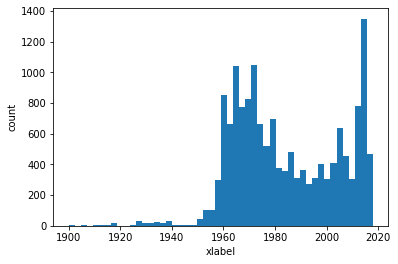

In [13]:
# In [17] in original notebook
plt.hist(train.build_year, bins=50, range=(1900, 2018))
plt.xlabel('xlabel')
plt.ylabel('count')
plt.show()

In [14]:
# Context: Explicitly specified by user, e.g. increasing weight of build_year and decreasing weights for the rest
train.setContext([lux.Spec(attribute="price_doc",weight=0.2),
                  lux.Spec(attribute="kitch_sq",weight=0.4),
                  lux.Spec(attribute="build_year",weight=1,binSize=50)])

[Spec < description:,channel:,attribute:price_doc,aggregation:,value:>dataModel:,dataType:,binSize:0, Spec < description:,channel:,attribute:kitch_sq,aggregation:,value:>dataModel:,dataType:,binSize:0, Spec < description:,channel:,attribute:build_year,aggregation:,value:>dataModel:,dataType:,binSize:50]


In [15]:
# In [18] in original notebook
train[train.life_sq >= 300]
# In [20] in original notebook
pos = (train.life_sq >= 100.0) & (train.life_sq > train.full_sq) & (train.id != 22788)
train.loc[pos, 'life_sq'] = train.loc[pos, 'life_sq']/10.0
train.loc[train.id == 13549, 'life_sq'] = 74.78 # fix special entry
# In [21] in original notebook
train.loc[train.full_sq == 5326, 'full_sq'] /= 100.0

pos = (train.full_sq >= 250.0) & (train.full_sq >= train.life_sq * 10)
train.loc[pos, 'full_sq'] = train.loc[pos, 'full_sq'] / 10.0
pos = (train.full_sq >= 250.0) & (train.full_sq >= train.life_sq) & (train.id != 18528)
train.loc[pos, 'full_sq'] /= 10.0
train.loc[pos, 'life_sq'] /= 10.0

In [16]:
# Context: Implicitly inferred full_sq and life_sq
train.setContext([lux.Spec(attribute="price_doc",weight=1), 
                  lux.Spec(attribute="kitch_sq",weight=0.2),
                 lux.Spec(attribute='full_sq',weight=0.7),
                 lux.Spec(attribute='life_sq',weight=0.7)])

[Spec < description:,channel:,attribute:price_doc,aggregation:,value:>dataModel:,dataType:,binSize:0, Spec < description:,channel:,attribute:kitch_sq,aggregation:,value:>dataModel:,dataType:,binSize:0, Spec < description:,channel:,attribute:full_sq,aggregation:,value:>dataModel:,dataType:,binSize:0, Spec < description:,channel:,attribute:life_sq,aggregation:,value:>dataModel:,dataType:,binSize:0]


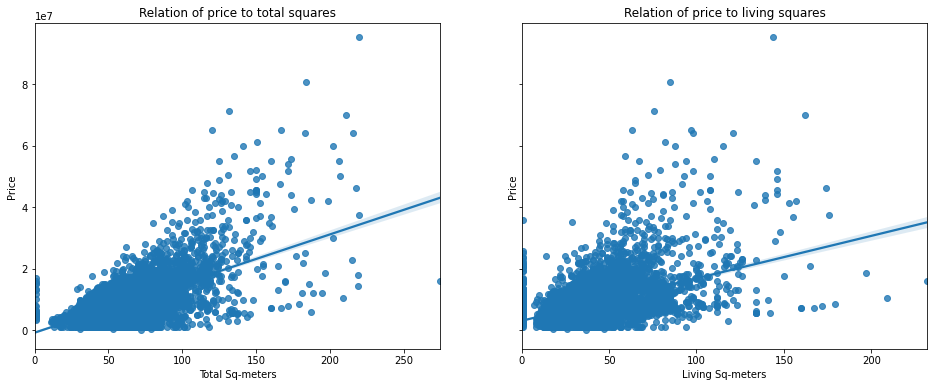

In [17]:
# In [22] in original notebook
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 6))
ax1 = sns.regplot(train.full_sq, train.price_doc, ax = ax1)
ax1.set_ylabel('Price')
ax1.set_xlabel('Total Sq-meters')
ax1.set_title('Relation of price to total squares')
ax2 = sns.regplot(train.life_sq, train.price_doc, ax = ax2)
ax2.set_xlabel('Living Sq-meters')
ax2.set_ylabel('Price')
ax2.set_title('Relation of price to living squares')
plt.show()

In [18]:
# In [22] in original notebook
print('Minimum number of living rooms:', train.num_room.min())
print('Maximum number of living rooms:', train.num_room.max())

Minimum number of living rooms: 0.0
Maximum number of living rooms: 19.0


In [19]:
# In [25-29] in original notebook, various inspect + replace based on num_room
train[train.num_room == 19]

train.loc[train.id == 11624, 'num_room'] = 1.0

train[train.num_room >= 15]

train.loc[train.id == 26716, 'num_room'] = 2.0

# train.ix[[17764, 29172]]
# train.ix[[17764, 29172], "num_room"] = np.NaN

In [20]:
# Context: Implicitly inferred num_room
train.setContext([lux.Spec(attribute="num_room",weight=0.4), 
                 lux.Spec(attribute="price_doc",weight=1), 
                 lux.Spec(attribute="kitch_sq",weight=0.2),
                 lux.Spec(attribute='full_sq',weight=0.7),
                 lux.Spec(attribute='life_sq',weight=0.7)])

[Spec < description:,channel:,attribute:num_room,aggregation:,value:>dataModel:,dataType:,binSize:0, Spec < description:,channel:,attribute:price_doc,aggregation:,value:>dataModel:,dataType:,binSize:0, Spec < description:,channel:,attribute:kitch_sq,aggregation:,value:>dataModel:,dataType:,binSize:0, Spec < description:,channel:,attribute:full_sq,aggregation:,value:>dataModel:,dataType:,binSize:0, Spec < description:,channel:,attribute:life_sq,aggregation:,value:>dataModel:,dataType:,binSize:0]


/Users/dorislee/Desktop/Research/lux/lux/lux/compiler/Validator.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  checkValExists = spec.attribute and spec.value in uniqueVals[spec.attribute]


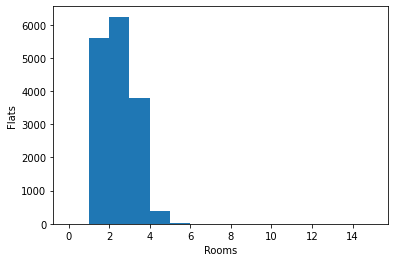

In [21]:
# In[30] in original notebook
plt.hist(train.num_room, bins = 15, range=(0,15), histtype='bar')
plt.xlabel('Rooms')
plt.ylabel('Flats')
plt.show()

In [22]:
# Context: Explicitly specify num_room
train.setContext([lux.Spec(attribute="num_room",weight=1), 
                 lux.Spec(attribute="price_doc",weight=0.8), 
                 lux.Spec(attribute="kitch_sq",weight=0.2),
                 lux.Spec(attribute='full_sq',weight=0.7),
                 lux.Spec(attribute='life_sq',weight=0.7)])

[Spec < description:,channel:,attribute:num_room,aggregation:,value:>dataModel:,dataType:,binSize:0, Spec < description:,channel:,attribute:price_doc,aggregation:,value:>dataModel:,dataType:,binSize:0, Spec < description:,channel:,attribute:kitch_sq,aggregation:,value:>dataModel:,dataType:,binSize:0, Spec < description:,channel:,attribute:full_sq,aggregation:,value:>dataModel:,dataType:,binSize:0, Spec < description:,channel:,attribute:life_sq,aggregation:,value:>dataModel:,dataType:,binSize:0]


In [23]:
train.product_type.unique()

array(['Investment', 'OwnerOccupier'], dtype=object)

In [24]:
# Context: Implicitly infer num_room
train.setContext([lux.Spec(attribute="num_room",weight=1),
                 lux.Spec(attribute="product_type",weight=0.8),
                 lux.Spec(attribute="price_doc",weight=0.8), 
                 lux.Spec(attribute="kitch_sq",weight=0.2),
                 lux.Spec(attribute='full_sq',weight=0.7),
                 lux.Spec(attribute='life_sq',weight=0.7)])

[Spec < description:,channel:,attribute:num_room,aggregation:,value:>dataModel:,dataType:,binSize:0, Spec < description:,channel:,attribute:product_type,aggregation:,value:>dataModel:,dataType:,binSize:0, Spec < description:,channel:,attribute:price_doc,aggregation:,value:>dataModel:,dataType:,binSize:0, Spec < description:,channel:,attribute:kitch_sq,aggregation:,value:>dataModel:,dataType:,binSize:0, Spec < description:,channel:,attribute:full_sq,aggregation:,value:>dataModel:,dataType:,binSize:0, Spec < description:,channel:,attribute:life_sq,aggregation:,value:>dataModel:,dataType:,binSize:0]


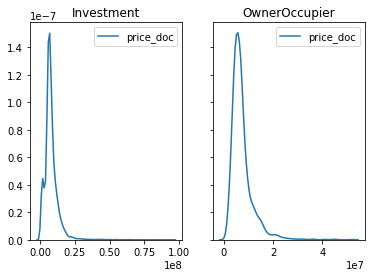

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.kdeplot(train[train.product_type == 'Investment'].price_doc, ax = ax1)
sns.kdeplot(train[train.product_type == 'OwnerOccupier'].price_doc, ax = ax2)
ax1.set_title('Investment')
ax2.set_title('OwnerOccupier')
plt.show()

In [26]:
# Context: Implicitly infer num_room
train.setContext([lux.Spec(attribute="num_room",weight=0.8),
                 lux.Spec(attribute="product_type",weight=1),
                 lux.Spec(attribute="price_doc",weight=0.8), 
                 lux.Spec(attribute="kitch_sq",weight=0.2),
                 lux.Spec(attribute='full_sq',weight=0.7),
                 lux.Spec(attribute='life_sq',weight=0.7)])

[Spec < description:,channel:,attribute:num_room,aggregation:,value:>dataModel:,dataType:,binSize:0, Spec < description:,channel:,attribute:product_type,aggregation:,value:>dataModel:,dataType:,binSize:0, Spec < description:,channel:,attribute:price_doc,aggregation:,value:>dataModel:,dataType:,binSize:0, Spec < description:,channel:,attribute:kitch_sq,aggregation:,value:>dataModel:,dataType:,binSize:0, Spec < description:,channel:,attribute:full_sq,aggregation:,value:>dataModel:,dataType:,binSize:0, Spec < description:,channel:,attribute:life_sq,aggregation:,value:>dataModel:,dataType:,binSize:0]


/Users/dorislee/Desktop/Research/lux/lux/lux/compiler/Validator.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  checkValExists = spec.attribute and spec.value in uniqueVals[spec.attribute]
